In [37]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("white")

## Read file with MRI data

In [50]:
with open('../results_1302.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    results = []
    for row in csv_reader:
        for i_col in range(230):
        
            results.append([])
            results[i_col].append(row[i_col])

In [130]:
df = pd.read_csv("../results_1302.csv", index_col=[0,1])
# Calculate the correlation matrix
corr = df.corr()
print(df)


                        SN CROWN_PD_MAP  SN_R CROWN_PD_MAP  SN_L CROWN_PD_MAP  \
personal_id patient_id                                                          
01-0002     0000997A            668.026         671.701887         663.880851   
01-0003     0000991B            686.626         685.528302         687.863830   
01-0004     0000DAD2            645.394         642.109434         649.097872   
01-0005     00006431            675.596         664.422642         688.195745   
01-0006     00001573            700.828         698.554717         703.391489   
01-0007     0000F8F8            614.022         608.109434         620.689362   
01-0008     0000CC09            641.416         627.996226         656.548936   
01-0009     00003848            653.914         653.875472         653.957447   
01-0010     0000565C            664.088         656.162264         673.025532   
01-0011     00000A67            636.830         642.732075         630.174468   
01-0012     00004510        

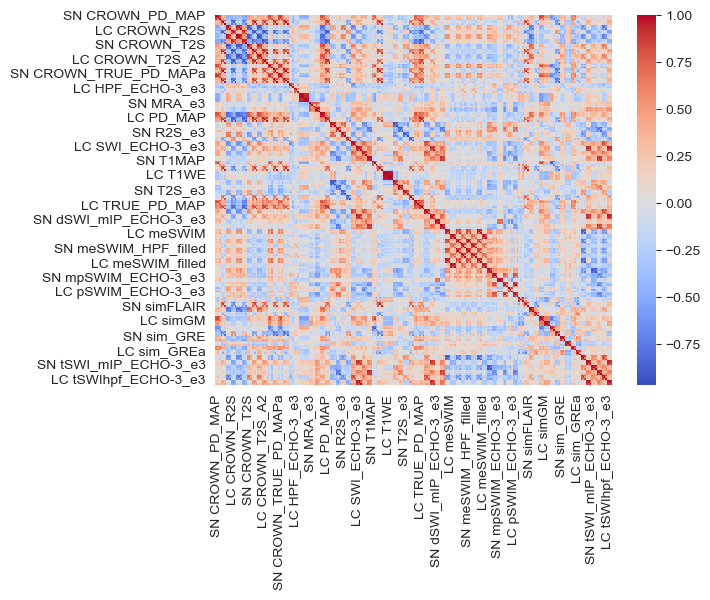

In [131]:
# Visualize the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm')

# Show the plot
plt.show()

<AxesSubplot:>

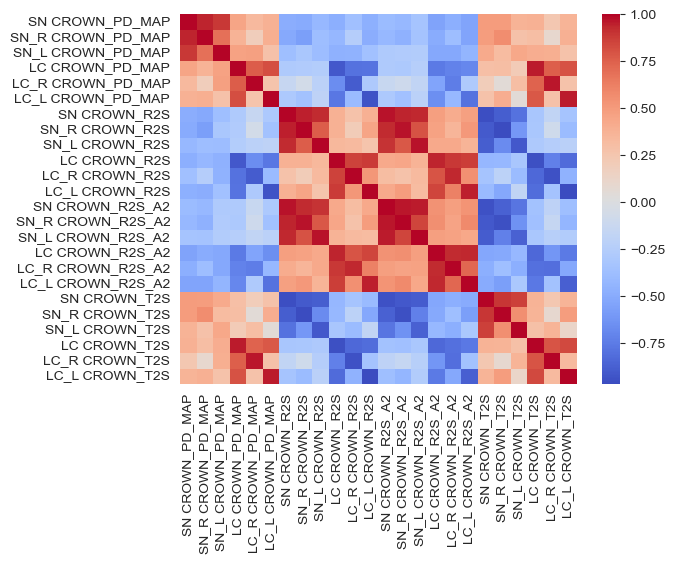

In [132]:
sns.heatmap(corr.iloc[:24,:24], cmap='coolwarm')

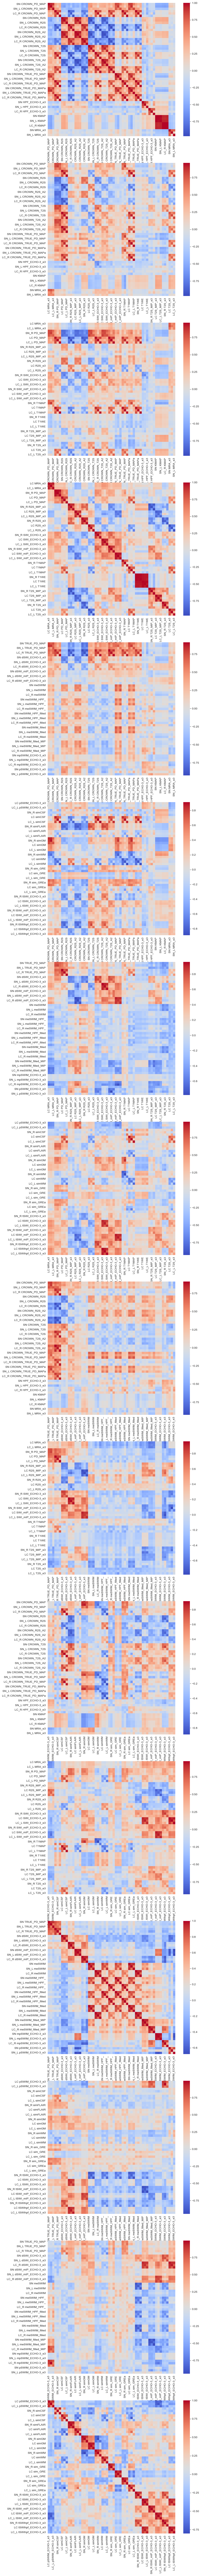

In [133]:
# Divide the correlation matrix into 16 subplots
f, ax = plt.subplots(16, figsize=(10, 160))

# Plot the heatmaps in the subplots
sns.heatmap(corr.iloc[:57,:57], ax=ax[0], cmap='coolwarm')
sns.heatmap(corr.iloc[:57,57:114], ax=ax[1], cmap='coolwarm')
sns.heatmap(corr.iloc[57:114,:57], ax=ax[2], cmap='coolwarm')
sns.heatmap(corr.iloc[57:114,57:114], ax=ax[3], cmap='coolwarm')

sns.heatmap(corr.iloc[114:171,:57], ax=ax[4], cmap='coolwarm')
sns.heatmap(corr.iloc[171:,:57], ax=ax[5], cmap='coolwarm')
sns.heatmap(corr.iloc[114:171,57:114], ax=ax[6], cmap='coolwarm')
sns.heatmap(corr.iloc[171:,57:114], ax=ax[7], cmap='coolwarm')

sns.heatmap(corr.iloc[:57,114:171], ax=ax[8], cmap='coolwarm')
sns.heatmap(corr.iloc[57:114,114:171], ax=ax[9], cmap='coolwarm')
sns.heatmap(corr.iloc[:57,171:], ax=ax[10], cmap='coolwarm')
sns.heatmap(corr.iloc[57:114,171:], ax=ax[11], cmap='coolwarm')

sns.heatmap(corr.iloc[114:171,114:171], ax=ax[12], cmap='coolwarm')
sns.heatmap(corr.iloc[171:,114:171], ax=ax[13], cmap='coolwarm')
sns.heatmap(corr.iloc[114:171,171:], ax=ax[14], cmap='coolwarm')
sns.heatmap(corr.iloc[171:,171:], ax=ax[15], cmap='coolwarm')

# Show the plot
plt.show()


In [134]:
print(df.shape)

# Feature matrix
X = df.values
print(X)

(43, 228)
[[668.026    671.701887 663.880851 ... 194.482143 181.614286 207.35    ]
 [686.626    685.528302 687.86383  ... 209.310714 209.642857 208.978571]
 [645.394    642.109434 649.097872 ... 235.475    234.142857 236.807143]
 ...
 [663.726    667.079245 659.944681 ... 246.010714 255.8      236.221429]
 [673.684    666.543396 681.73617  ... 181.321429 182.892857 179.75    ]
 [661.548    660.007547 663.285106 ... 238.589286 241.292857 235.885714]]


In [135]:
print(df.index)

MultiIndex([('01-0002', '0000997A'),
            ('01-0003', '0000991B'),
            ('01-0004', '0000DAD2'),
            ('01-0005', '00006431'),
            ('01-0006', '00001573'),
            ('01-0007', '0000F8F8'),
            ('01-0008', '0000CC09'),
            ('01-0009', '00003848'),
            ('01-0010', '0000565C'),
            ('01-0011', '00000A67'),
            ('01-0012', '00004510'),
            ('01-0013', '0000EF8B'),
            ('01-0014', '00004E2A'),
            ('01-0015', '00005316'),
            ('01-0016', '0000F262'),
            ('01-0017', '0000D2D0'),
            ('01-0018', '000037D3'),
            ('01-0019', '00007CE3'),
            ('01-0020', '0000F810'),
            ('01-0021', '000038BE'),
            ('01-0022', '0000F633'),
            ('01-0023', '00000172'),
            ('01-0024', '0000AA56'),
            ('01-0025', '000090DC'),
            ('01-0026', '0000C65E'),
            ('01-0027', '000096EB'),
            ('01-0029', '0000868E'),
 

### Standardise

In [136]:
from sklearn.preprocessing import StandardScaler

# Create the object
scaler = StandardScaler()
# Calculate the mean and standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

### Choose the right number of dimensions

In [137]:
from sklearn.decomposition import PCA 

pca_228 = PCA(n_components=None, random_state=2020)
pca_228.fit(X_scaled)
X_pca_228 = pca_228.transform(X_scaled)
print("Variance explained by all principal components: ")
print(sum(pca_228.explained_variance_ratio_ * 100))

Variance explained by all principal components: 
99.99999999999999


In [164]:
pca_228.explained_variance_ratio_ * 100

array([2.10668315e+01, 1.47575105e+01, 1.10695120e+01, 8.78916855e+00,
       5.81035365e+00, 5.38922950e+00, 4.28901645e+00, 4.14654555e+00,
       3.22106660e+00, 2.98934378e+00, 2.76002486e+00, 2.32867087e+00,
       1.71034003e+00, 1.39861934e+00, 1.29875684e+00, 1.26023694e+00,
       1.10138464e+00, 7.81621750e-01, 7.16740511e-01, 6.09744469e-01,
       5.17338158e-01, 4.83477794e-01, 4.17691576e-01, 3.78286139e-01,
       3.40695277e-01, 3.08302750e-01, 2.68072030e-01, 2.60529136e-01,
       2.32952946e-01, 2.07899227e-01, 1.82351045e-01, 1.66218238e-01,
       1.36616512e-01, 1.21875785e-01, 9.06335485e-02, 8.62513345e-02,
       7.22969756e-02, 5.66339953e-02, 5.59055146e-02, 5.19387297e-02,
       3.65986432e-02, 3.27162067e-02, 4.15469995e-30])

In [139]:
# Cumulative explained variance [%]
np.cumsum (pca_228.explained_variance_ratio_ * 100)

array([ 21.06683153,  35.82434206,  46.89385411,  55.68302266,
        61.49337631,  66.88260581,  71.17162225,  75.31816781,
        78.5392344 ,  81.52857818,  84.28860304,  86.61727392,
        88.32761395,  89.72623329,  91.02499012,  92.28522706,
        93.38661171,  94.16823346,  94.88497397,  95.49471844,
        96.0120566 ,  96.49553439,  96.91322597,  97.29151211,
        97.63220738,  97.94051013,  98.20858216,  98.4691113 ,
        98.70206425,  98.90996347,  99.09231452,  99.25853275,
        99.39514927,  99.51702505,  99.6076586 ,  99.69390993,
        99.76620691,  99.82284091,  99.87874642,  99.93068515,
        99.96728379, 100.        , 100.        ])

Text(0, 0.5, 'Explained variance')

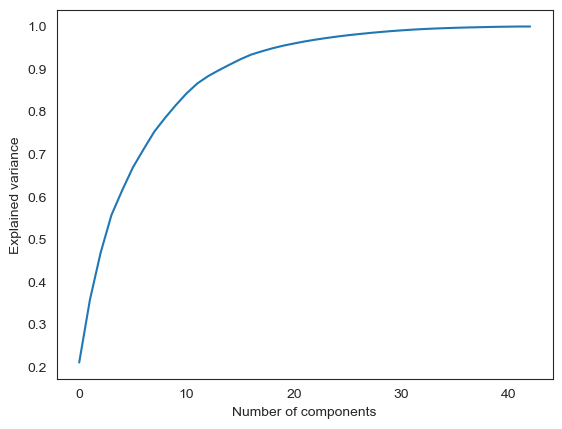

In [140]:
plt.plot(np.cumsum(pca_228.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

### Apply PCA by setting n_components=2

In [141]:
pca_2 = PCA(n_components=2, random_state=2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

Text(0, 0.5, 'Second principal component')

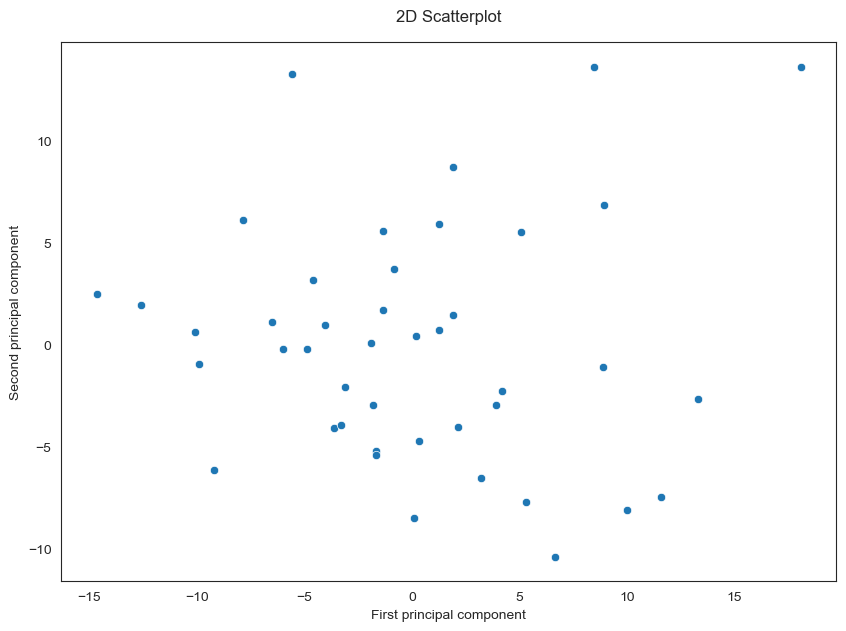

In [143]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1])
plt.title("2D Scatterplot", pad=15)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### Apply PCA by setting n_components=3

In [150]:
pca_3 = PCA(n_components=3, random_state=2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

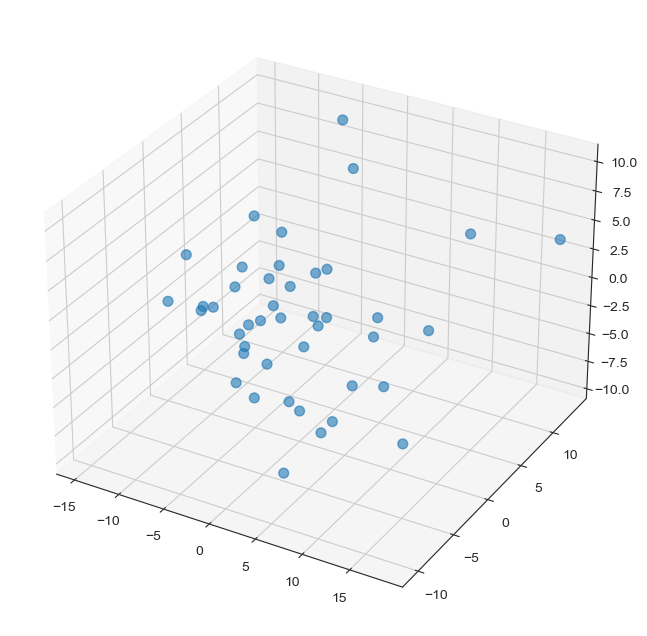

In [165]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12, 8))
ax = plt.axes (projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], s=50, alpha=0.6)

## Read file with clinical data

In [144]:
df = pd.read_excel("../explanations_riemer_january.xlsx")
print(df.columns)

Index(['id', 'id ', 'status', 'gender', 'yearofbirth', 'ageatbaseline',
       'yearofdiagnosis', 'ageatonset_diagnosis', 'ageatonset_symptoms',
       'diseaseduration', 'mdsupdrsI', 'mdsupdrsII', 'mdsupdrsIIIcalc',
       'mdsupdrsIV', 'mdsupdrstotalcalc', 'tdpigdphenotype', 'hoehnyahr',
       'mdsnmstotal', 'mdsnmsnmf', 'moca', 'bsit'],
      dtype='object')


In [145]:
df = pd.read_excel("../data_riemer_january2023.xlsx", header=None)
print(df)

         0        1        2       3     4     5       6     7     8      9   \
0   01-0002  01-0002  control  female  1954  67.0     NaN   NaN   NaN    NaN   
1   01-0003  01-0003  patient  female  1959  62.0  2017.0  58.0  57.0   50.0   
2   01-0004  01-0004  control    male  1957  63.0     NaN   NaN   NaN    NaN   
3   01-0005  01-0005  patient  female  1952  68.0  2016.0  64.0  61.0   84.0   
4   01-0006  01-0006  patient  female  1960  61.0  2017.0  57.0  58.0   36.0   
..      ...      ...      ...     ...   ...   ...     ...   ...   ...    ...   
85  02-0012  02-0012  control    male  1954  67.0     NaN   NaN   NaN    NaN   
86  02-0021  02-0021  control    male  1952  69.0     NaN   NaN   NaN    NaN   
87  02-0023  02-0023  patient    male  1951  71.0  2019.0  68.0  67.0   39.0   
88  02-0024  02-0024  control  female  1947  74.0     NaN   NaN   NaN    NaN   
89  02-0028  02-0028  patient  female  1943  78.0  2014.0  71.0  67.0  130.0   

    ...    11    12   13    14    15   

In [147]:
print(df.iloc[:43,2])

0     control
1     patient
2     control
3     patient
4     patient
5     patient
6     patient
7     patient
8     patient
9     control
10    patient
11    patient
12    patient
13    patient
14    control
15    patient
16    patient
17    control
18    patient
19    control
20    patient
21    control
22    patient
23    patient
24    control
25    patient
26    patient
27    patient
28    patient
29    control
30    patient
31    control
32    patient
33    control
34    patient
35    control
36    patient
37    control
38    patient
39    patient
40    patient
41    control
42    patient
Name: 2, dtype: object


Text(0, 0.5, 'Second principal component')

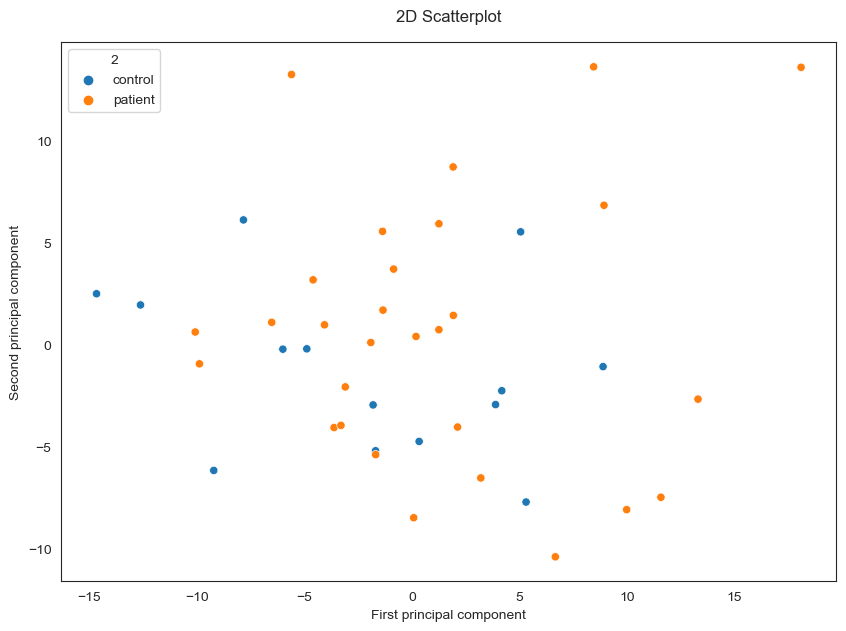

In [170]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=df.iloc[:43,2])
plt.title("2D Scatterplot", pad=15)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [168]:
c = []
for status in df.iloc[:43,2]:
    if status == 'control':
        c.append('blue')
    else:
        c.append('orange')
print(c)

['blue', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'orange', 'orange', 'blue', 'orange']


Text(0.5, 0, 'Third principal component')

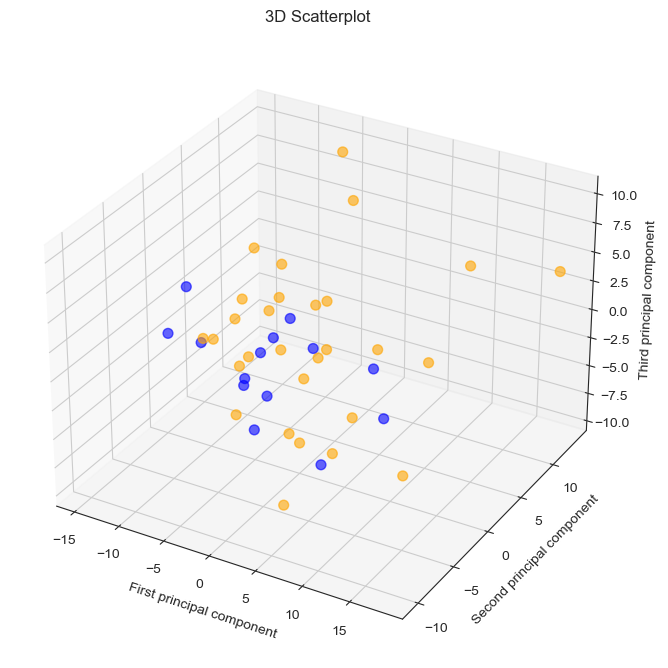

In [169]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12, 8))
ax = plt.axes (projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c = c, s=50, alpha=0.6)
plt.title("3D Scatterplot", pad=15)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_zlabel("Third principal component")

## Mean and standard deviation

In [51]:

for i in range(228):
    print(results[i+2][0])
    values = np.asarray(results[i+2][1:], dtype=np.float32)
    mean = np.mean(values)
    print('Mean: ' + str(mean))
    std = np.std(values)
    print('Standard deviation: ' + str(std))
    print()

SN CROWN_PD_MAP
Mean: 656.51105
Standard deviation: 28.314547

SN_R CROWN_PD_MAP
Mean: 650.3728
Standard deviation: 34.905334

SN_L CROWN_PD_MAP
Mean: 663.43286
Standard deviation: 27.443968

LC CROWN_PD_MAP
Mean: 708.7367
Standard deviation: 47.584496

LC_R CROWN_PD_MAP
Mean: 695.58765
Standard deviation: 60.30766

LC_L CROWN_PD_MAP
Mean: 721.8857
Standard deviation: 67.25686

SN CROWN_R2S
Mean: 2584.3918
Standard deviation: 361.66992

SN_R CROWN_R2S
Mean: 2609.6843
Standard deviation: 386.77054

SN_L CROWN_R2S
Mean: 2555.87
Standard deviation: 388.57065

LC CROWN_R2S
Mean: 1597.0663
Standard deviation: 277.6951

LC_R CROWN_R2S
Mean: 1639.552
Standard deviation: 309.6726

LC_L CROWN_R2S
Mean: 1554.5809
Standard deviation: 343.41202

SN CROWN_R2S_A2
Mean: 3133.117
Standard deviation: 612.6157

SN_R CROWN_R2S_A2
Mean: 3153.0627
Standard deviation: 630.5465

SN_L CROWN_R2S_A2
Mean: 3110.6248
Standard deviation: 652.26764

LC CROWN_R2S_A2
Mean: 1732.2562
Standard deviation: 420.7321

LC_R

## Histogram

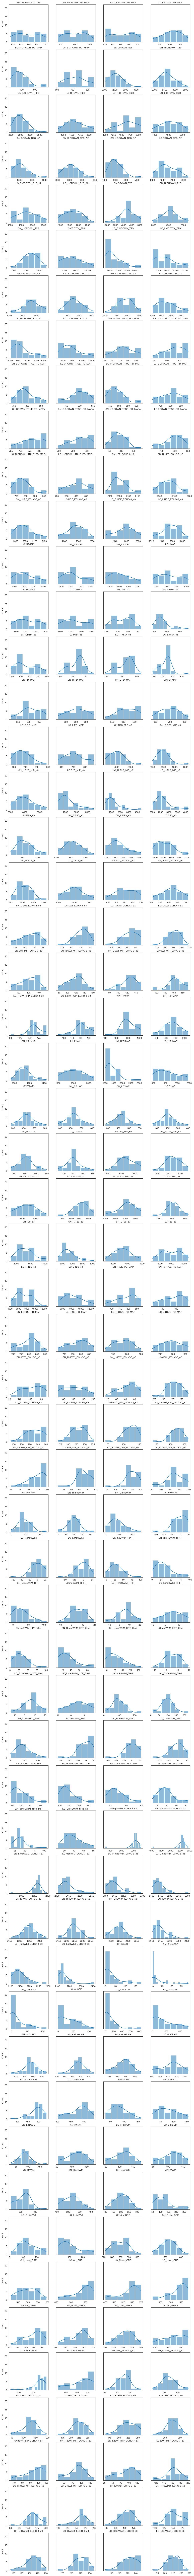

In [52]:
fig, axes = plt.subplots(57, 4, figsize=(14,199.5), sharey=True)
for j in range(57):
    for i in range(4):
        sns.histplot(ax=axes[j,i], x=np.asarray(results[4*j+i+2][1:], dtype=np.float32), kde=True)
        axes[j,i].set_title(results[4*j+i+2][0], size=10)
fig.savefig('test.png', bbox_inches='tight')

## Segmentation of SNpc and LC on T1WE image

In [62]:
import sys
import matplotlib.image as mpimg

In [64]:
sys.path.append(sys.path[0] + '/../T1WE')

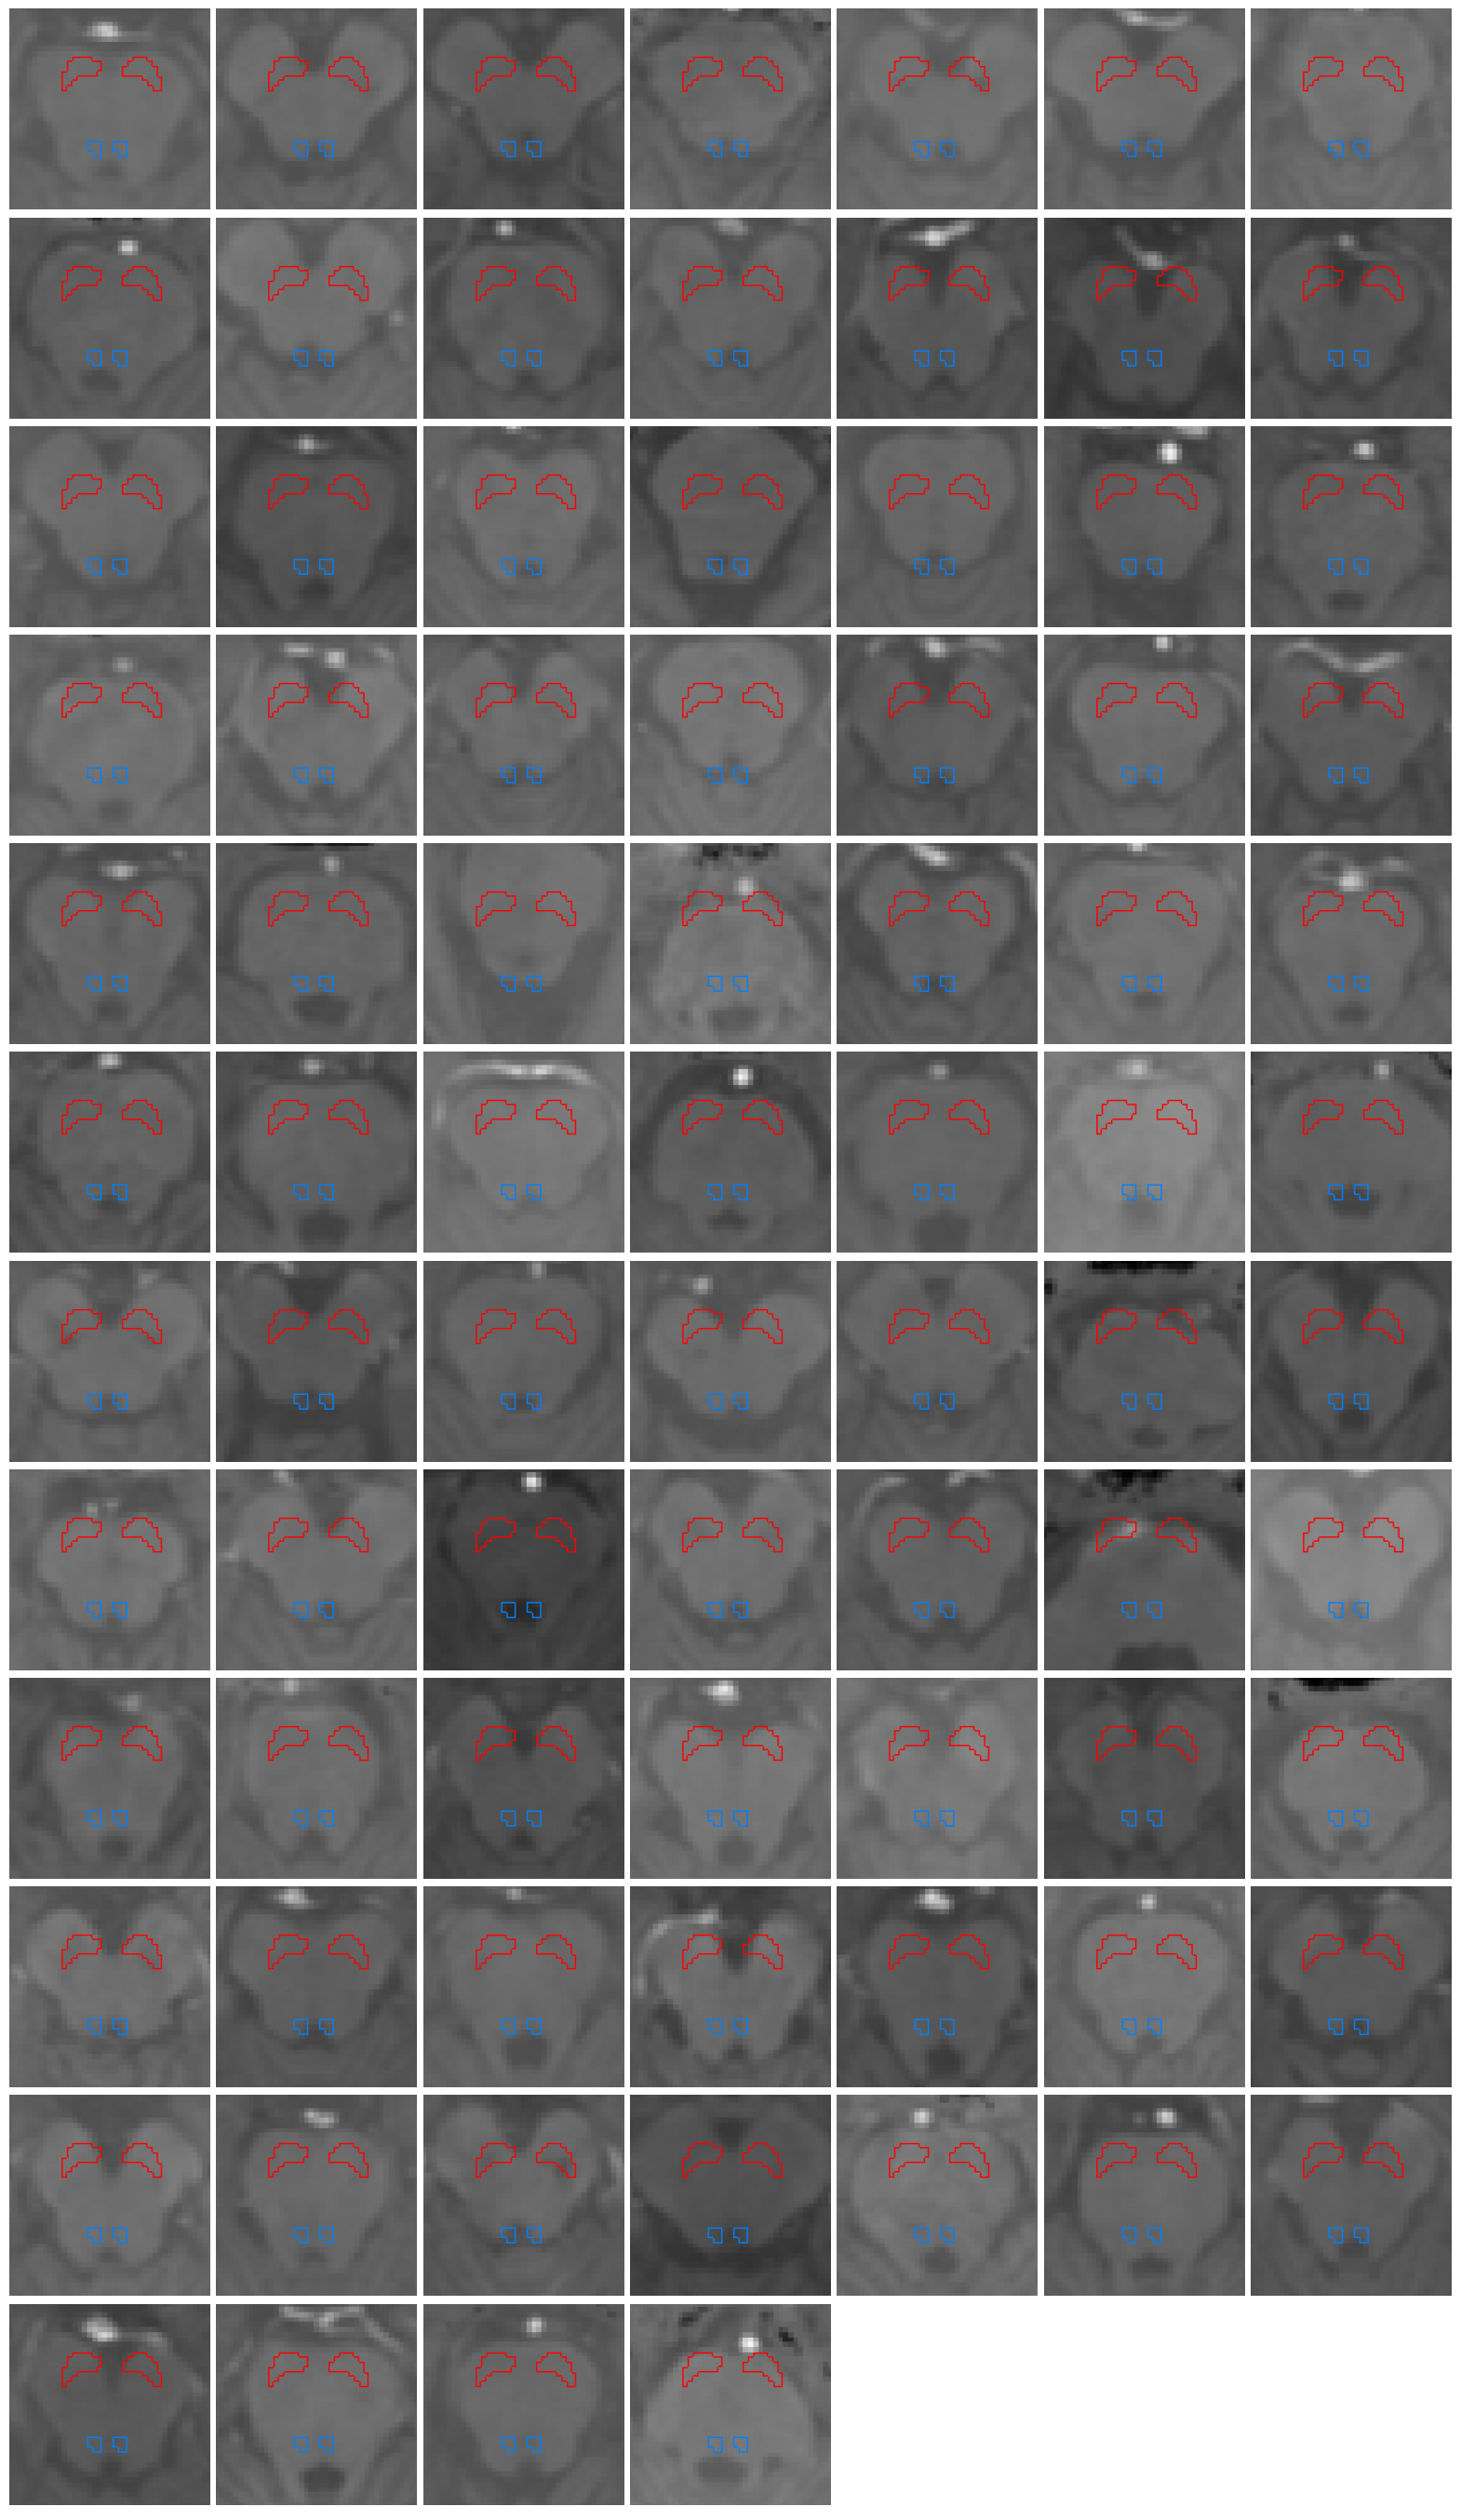

In [65]:
fig, axes = plt.subplots(12, 7, figsize=(20,35), sharey=True)
for path, directories, files in os.walk(sys.path[-1]):
    for file in files:
        img = mpimg.imread('../T1WE/' + file)
        index = files.index(file)
        j = index//7
        i = index%7
        axes[j,i].imshow(img)
        axes[j,i].axis('off')
        
axes[11,4].axis('off')
axes[11,5].axis('off')
axes[11,6].axis('off')
plt.subplots_adjust(wspace=0.03, hspace=-0.02)
fig.savefig('collage_T1WE.png', bbox_inches='tight')

## Visual inspection of segmentation of SNpc and LC on T1WE image

(0.0, 1.0, 149.5, -0.5)

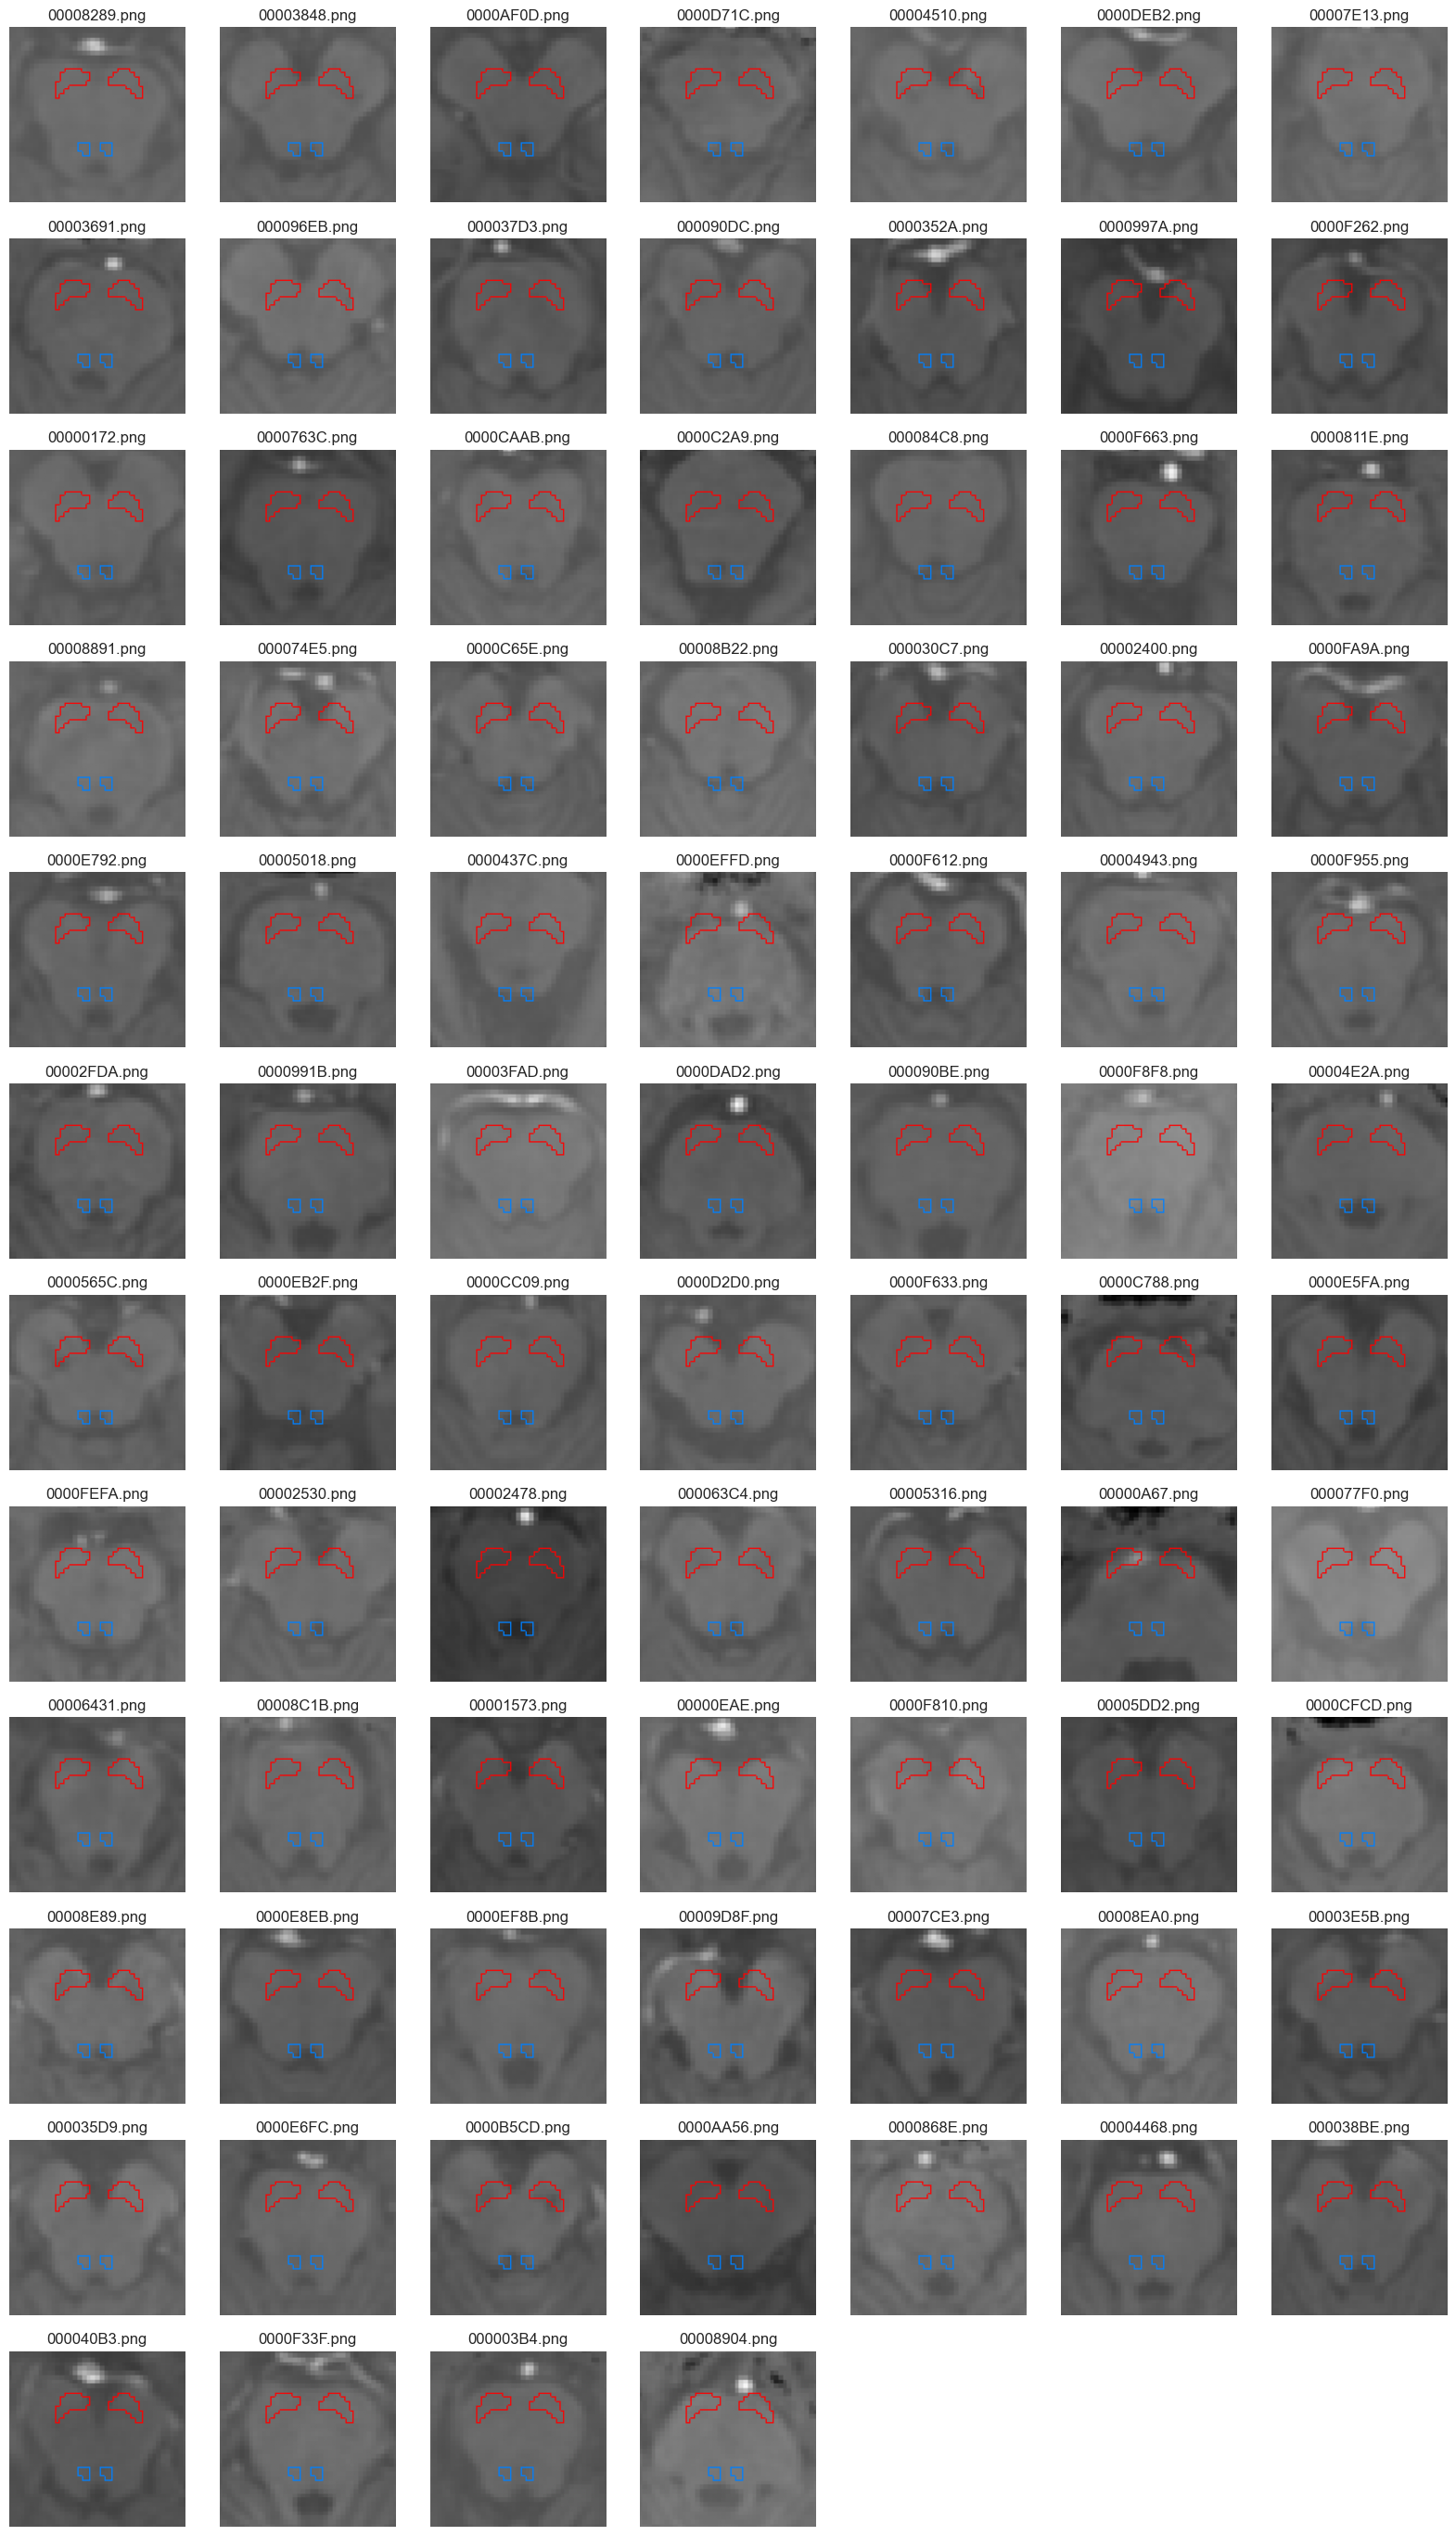

In [66]:
fig, axes = plt.subplots(12, 7, figsize=(20,35), sharey=True)
for path, directories, files in os.walk(sys.path[-1]):
    for file in files:
        img = mpimg.imread('../T1WE/' + file)
        index = files.index(file)
        j = index//7
        i = index%7
        axes[j,i].imshow(img)
        axes[j,i].axis('off')
        axes[j,i].set_title(file)
        
axes[11,4].axis('off')
axes[11,5].axis('off')
axes[11,6].axis('off')